# 階段関数のフーリエ級数を書きたい

http://qiita.com/xr0038/items/d82ebcb13921d9002ac9 を python に移植したい。

## フーリエ計算の基礎関数定義

In [13]:
import math

# 第 n 項
def step_ft_fourier_n(x, n):
    return 4.0 / math.pi / (2 * n - 1) * math.sin((2 * n - 1) * x)

# n 項までの和
def step_ft_fourier(x, n):
    sumlist = [step_ft_fourier_n(x, k) for k in range(1, n + 1)]
    return sum(sumlist)

x = 1
n = 3
print(step_ft_fourier_n(x, n))
print(step_ft_fourier(x, n))

-0.2441880613815181
0.8870992638281932


## 時間の範囲

numpy 使えば次の関数いらないか？

In [16]:
def frange(start, final, interval):
    numbers = []
    # float だと range が使えないのでこの処理
    while start < final:
        numbers.append(start)
        start = start + interval

    return numbers

## 和を図示してみる

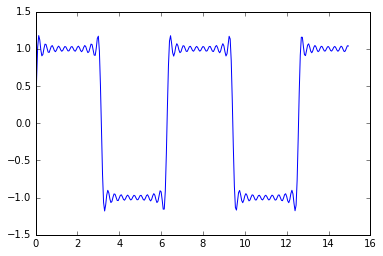

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# フーリエ級数の打ち切り項数
N = 10

ts = frange(0, 15, 0.05)
xs = []
for t in ts:
    xs.append(step_ft_fourier(t, N))

plt.plot(ts, xs)
plt.show()

## 円の動きをトレースしてみたい

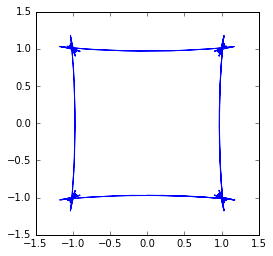

In [18]:
# x 座標
def x_fourier(t, n):
    return step_ft_fourier(t, n)
# y 座標
def y_fourier(t, n):
    return step_ft_fourier(t - math.pi / 2, n)

N = 10

ts = frange(0, 15, 0.05)
xs = []
ys = []
for t in ts:
    xs.append(x_fourier(t, N))
    ys.append(y_fourier(t, N))

plt.axis([-1.5, 1.5, -1.5, 1.5]) 
#plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xs, ys)
plt.show()

## 上のプロットをアニメーションさせてみた

動かないので調整中.

<IPython.core.display.Javascript object>


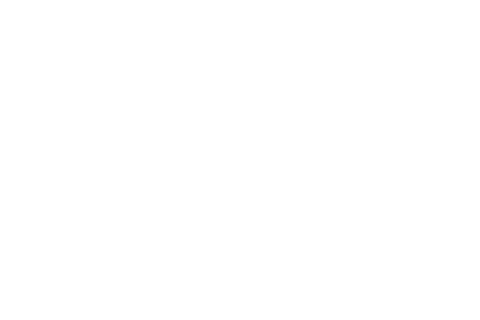

<IPython.core.display.Javascript object>


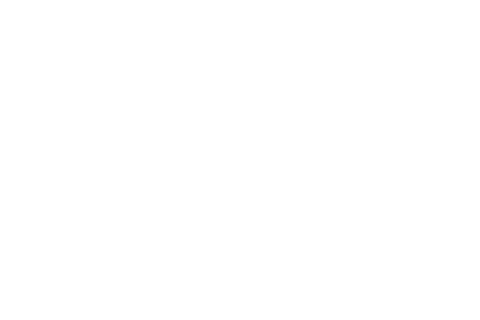

In [21]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

N = 10

ims = []
xs = []
ys = []
ts = frange(0, 50, 1)
for t in ts:
    x = x_fourier(2 * math.pi * t / 50, N)
    y = y_fourier(2 * math.pi * t / 50, N)
    im = plt.plot(x, y, "o")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<IPython.core.display.Javascript object>


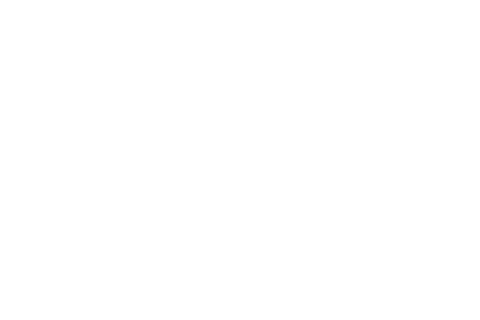

<IPython.core.display.Javascript object>


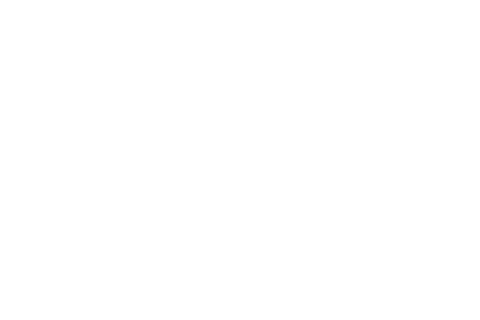

In [20]:
import matplotlib.animation as animation

fig = plt.figure()

N = 10

ims = []
xs = []
ys = []
ts = frange(0, 50, 1)
for t in ts:
    xs = []
    ys = []
    for n in range(1, 6):
        xs.append(x_fourier(2 * math.pi * t / 50, n))
        ys.append(y_fourier(2 * math.pi * t / 50, n))
        im = plt.plot(xs, ys, "o")
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## TODO ここまでの円上の動きとフーリエ級数の動きを組み合わせて見せたい